# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [2]:
## Load tidyverse: 
library(tidyverse)

## Set working directory: 
setwd("~/Documents/GitHub/Goldberg_DSPN_S22/lexDat")

## Read in .csv files
lexDat_accuracy_df <- read.csv("LexicalData_withIncorrect.csv")
Items_df <- read.csv("Items.csv")

## Add Length and Log_Freq_HAL from Items data frame to Lexical Data data frame
lexDat_accuracy_df2 <- lexDat_accuracy_df %>% 
  left_join(
    select(Items_df, Word, Length, Log_Freq_HAL),
    by = c("D_Word" = "Word")
  )

## Eliminate observations with missing values
lexDat_accuracy_df2 %>% drop_na() -> lexDat_accuracy_final

## Check this was successful
is.na(lexDat_accuracy_final) %>% any

## Print the first few rows of the data fraem
head(lexDat_accuracy_final)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] FALSE

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

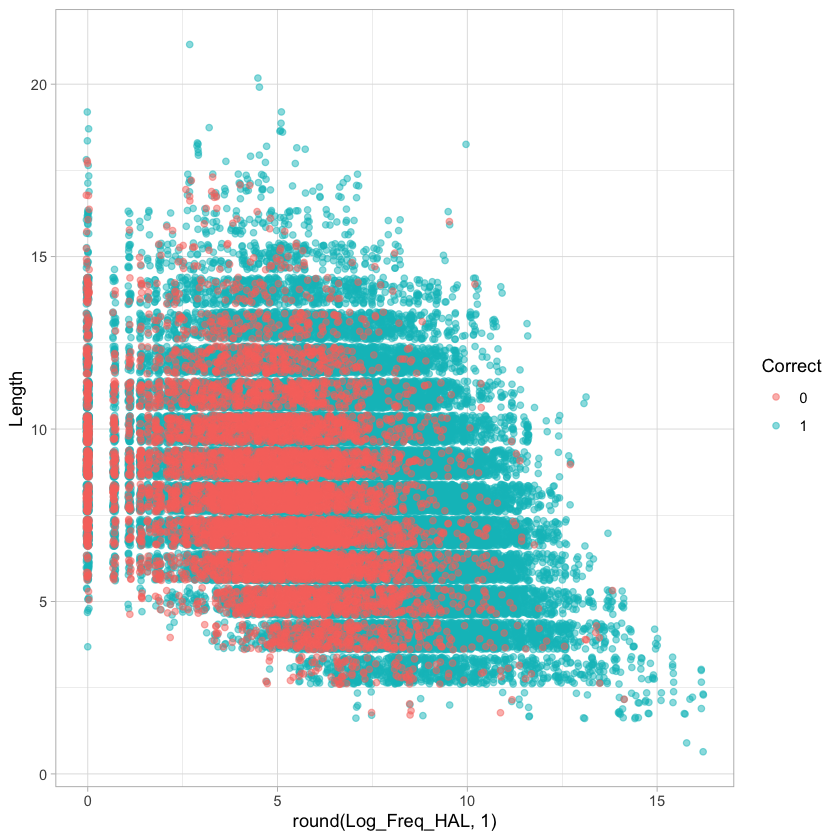

In [2]:
# vrequire(tidyverse) # Load the tidyverse package, if you haven't yet

lexDat_accuracy_final$Correct <- as.factor(lexDat_accuracy_final$Correct) # so that R knows that Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
library(ggplot2)
ggplot(lexDat_accuracy_final,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

The cluster of correct answers (in blue) takes up much more space than the incorrect cluster (red on this plot. This could be due to a larger number of correct responses given, spanning a wider range of x and y values. The incorrect cluster essentially overlays the correct cluster, notably for low to mid X values (that is, when Log_Freq_HAL exceeds a value of 10, the frequency of incorrect response observations is dramatically lessened compared to Log_Freq_HAL less than 10). It does appear that both clusters exhibit somewhat of a negative relationship between the Log_Freq_HAL and Length, such that correct and incorrect responses with low Log_Freq_HAL values tend to have mid to high length values. 

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [3]:
lexDat_glm.fit = glm(Correct ~ Length*Log_Freq_HAL, data = lexDat_accuracy_final, family = binomial)
glm_summary <- summary(lexDat_glm.fit)
print(glm_summary)



Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = lexDat_accuracy_final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5



What can you conclude from this output? (a brief gist is fine)

Length and Log_Freq_HAL are both numeric variables. The intercept suggests that the log odds of a subject accurately decide if a letter string is a true word or non-word when the length of that word and Hyperspace Analogue to Language (HAL) frequency norms are both equal to 0 (impossible, and thus interpreting the intercept alone is not all that informative). Regardless, the log odds of accurate decision of word vs. non-word under these reference conditions is equal to -0.940. 

The main effect of Length is significant (p<0.001***), and suggests that for every 1 unit increase in length (e.g. for each letter added to a word), the log odds for an average subject to accurately decide if a word is real or not-real increases 0.151 times. 

The main effect of Log_Freq_HAL is significant (p<0.001***), and suggests that for every 1 unit increase in Hyperspace Analogue to Language (HAL) frequency norm value, the log odds for an average subject to accurately decide if a word is real or not-real increases by 0.395 times.

The interaction between Length and Log_Freq_HAL is significant (p<0.001***), and suggests that the influence of word length on judgment accuracy decreases with increasing Hyperspace Analogue to Language (HAL) frequency norm value.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [4]:
## Assign threshold to equal 0.50
threshold = 0.50

## Create object for total number of observations in the final data frame used
num_observations = nrow(lexDat_accuracy_final)
num_observations

## Create new data frame containing predicted values for each observation, 
## based on the fit of the logistic regression model run in part 3. 
glm_prob_df = data.frame(predict(lexDat_glm.fit, type = "response"))

## Rename the predicted values generated above to "predicted_prob" for ease of interpretability
colnames(glm_prob_df) = c('predicted_prob')
head(glm_prob_df)

# Make a list of "Incorrect" responses (coded as 0)
glm_prob_df$predicted_binary=rep(0,num_observations)
head(glm_prob_df)

# Use the probability output to label the "Correct" responses (coded as 1). 
## This code essentially says that if the predicted probabilty of an observation
## is greater than 0.50, then it is assigned as "Correct" or 1. 
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]= 1


# Look at the prediction accuracy in form of confusion matrix table
confusion_df = data.frame(glm_prob_df$predicted_binary, lexDat_accuracy_final$Correct)
colnames(confusion_df) = c('predicted', 'actual')
table(confusion_df)

## Abbreviated summary: 
## 13 predicted 0 actual 0 (true neg)
## 44 predicted 0 actual 1 (false neg)
## 7966 predicted 1 actual 0 (fale pos)
## 62566 predicted 1 actual 1 (true pos)

## Calculate the general accuracy of the model's predictions: 
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

[1] 70589

,predicted_prob
,<dbl>
1,0.9479784
2,0.8826628
3,0.9417677
4,0.7707288
5,0.6682356
6,0.8704362


,predicted_prob,predicted_binary
,<dbl>,<dbl>
1,0.9479784,0
2,0.8826628,0
3,0.9417677,0
4,0.7707288,0
5,0.6682356,0
6,0.8704362,0


         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not? 

Overall I think the modeldid not do a "good" job at predicting lexical decision correctness. There are some strengths and some weaknesses to describe here. Note, the overall prediction accuracy (88.65%) is really promising; however It's really important to interrogate where the model succeeded and failed.  

First, 62566 out of the 62610 (62566 + 44) actually correct observations were classified appropriately; this is a true positive rate of 62566/62610 = 99.92%. I believe that the model's ability to correctly classify correct responses serves as a huge strength - it is very good at classifying true positive observations. 

The same impressive classification rate does not transfer to incorrect observations. Specifically, the model inaccurately classified incorrect responses as correct responses for 7966 out of the 7979 (13 + 7966) possible incorrect observations. This means there was a false positive rate of 7966/7979 = 99.84%. **This** is a huge issue with the model - this means that the model classified true negatives correctly only 13/7979 = 0.16% of the time, and that the model is prone to making type 1 errors.

The high prediction accuracy is driven almost exclusively by the true positive accuracy rate; true positive classifications comprise only one half of the classification problem and the poor accuracy for true negative observations is problematic. If the investigators are only interested in using a model that's good at identifying true positives, then this model could be a candidate; however if they are interested in both true positives and negatives, this model will not be adequate as is.

One thing to mention is that in this example there is no test train split; so we could consider this entire endeavor as a training opportunity. With this in mind, if I give the model new data, I should expect the model performance to be lower. 

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [5]:
## Load in MASS library
library(MASS)

## Fit QDA model on data set (no test train split here)
lexDat_qda.fit = qda(Correct ~ Length*Log_Freq_HAL, data=lexDat_accuracy_final)
lexDat_qda.fit


## Create a data frame containing posterior probabilities of 0 and 1 for each observation
qda_prob_df = data.frame(predict(lexDat_qda.fit, type = "response"))
head(qda_prob_df)

## Take that new data frame and create a new column such that if the
## posterior probability of 1 is greater than 0.5, it will assign a 1 and otherwise
## will assign a 0:

qda_prob_df %>%
  mutate(predicted_binary = if_else(posterior.1 >= threshold, 1, 0)) -> qda_prob_df2



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
qda(Correct ~ Length * Log_Freq_HAL, data = lexDat_accuracy_final)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219

,class,posterior.0,posterior.1
,<fct>,<dbl>,<dbl>
1,1,0.02842981,0.9715702
2,1,0.15567716,0.8443228
3,1,0.05352231,0.9464777
4,1,0.25641008,0.7435899
5,1,0.31449666,0.6855033
6,1,0.14651538,0.8534846


Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [6]:
## Generate confusion matrix
confusion_df2 = data.frame(qda_prob_df2$predicted_binary, lexDat_accuracy_final$Correct)
colnames(confusion_df2) = c('predicted', 'actual')
table(confusion_df2)


print(paste("Accuracy:",mean(confusion_df2$predicted == confusion_df2$actual)))

         actual
predicted     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

The overall accuracy of my QDA is slightly lower (87.01% for QDA vs. 88.65% for logistic regression). 

The QDA was also very successful with accurately identifying true positive observations (60963/62610 = 0.9737), though just slightly less accurate than logistic regression. Thus, slightly more false positive classifications were made by QDA than logistic regression. 

Regarding true and false negatives - QDA also misclassified majority of the incorrect responses as correct (7524/7979 = 0.9430). Thus both models performed pretty similarly, with slightly more (1) overall accuracy and (2) true positive classification rate observed using logistic regression. 

**DUE:** 5pm EST, April 1, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Monique Tardif, who deserves a nice break and jumbo boba. Avital Pelakh offered advice on issues I was having with left_join()